In [1]:
# -*- coding: utf-8 -*-

#advection_central_difference, a demonstration of FVM for transport equation in 1D
#Copyright (C) 2020  Boštjan Mavrič, Matjaž Zadnik
#
#This program is free software: you can redistribute it and/or modify
#it under the terms of the GNU General Public License as published by
#the Free Software Foundation, either version 3 of the License, or
#(at your option) any later version.
#
#This program is distributed in the hope that it will be useful,
#but WITHOUT ANY WARRANTY; without even the implied warranty of
#MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#GNU General Public License for more details.
#
#You should have received a copy of the GNU General Public License
#along with this program.  If not, see <http://www.gnu.org/licenses/>.

from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual



def TDMAsolver(a, b, c, d):
        '''
        TDMA solver, a b c d can be NumPy array type or Python list type.
        refer to http://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm
        and to http://www.cfd-online.com/Wiki/Tridiagonal_matrix_algorithm_-_TDMA_(Thomas_algorithm)
        '''
        nf = len(d) # number of equations
        ac, bc, cc, dc = map(np.array, (a, b, c, d)) # copy arrays
        for it in range(1, nf):
            mc = ac[it-1]/bc[it-1]
            bc[it] = bc[it] - mc*cc[it-1] 
            dc[it] = dc[it] - mc*dc[it-1]

        xc = bc
        xc[-1] = dc[-1]/bc[-1]

        for il in range(nf-2, -1, -1):
            xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

        return xc

def CD_advection(N, u):
    # Transport v 1D z advekcijo in difuzijo 

    # Robni pogoji
    fiA=1 # pri x=0
    fiB=0 # pri x=L

    # Snovni parametri
    L=1 # [m] dolžina odseka
    rho=1 # [kg/m^3] gostota transportirane količine
    #u=20 # [m/s] hitrost tekočine
    Gama=0.1 # [kg/ms] posplošen koeficient prevodnosti

    # Diskretizacija
    #N=50 # število mrežnih točk
    dx=L/N # [m] krajevni korak


    # mrežne točke od 2 do N-1
    F=rho*u
    D=Gama/dx 
    
    aE=D-F/2
    aW=D+F/2
    aP=aE+aW
    Su=0

    # Matrika sistema brez upoštevanja robnih pogojev
    d=aP*np.ones(N) # diagonala
    s=-aW*np.ones(N-1) # spodnja obdiagonala
    z=-aE*np.ones(N-1) # zgornja obdiagonala
    b=Su*np.ones(N) # vektor vrednosti izvorov


    # levi rob (točka 1)
    aE=D-F/2
    aW=0
    Sp=-(2*D+F)
    Su=(2*D+F)*fiA
    aP=aE+aW-Sp

    d[0]=aP
    b[0]=Su

    # Desni rob (točka N)
    aE=0
    aW=D+F/2
    Sp=-(2*D-F)
    Su=(2*D-F)*fiB
    aP=aE+aW-Sp

    d[N-1]=aP
    b[N-1]=Su

    # Rešimo sistem enačb
    fi=TDMAsolver(s, d, z, b)

    # krajevna mreža
    x_tab=np.array([dx*i for i in range(N)])
    x_tab=x_tab+dx/2
    
    def analiticFi(x):
        'Točna rešitev'
        return fiA+(fiB-fiA)*(np.exp(rho*u*x/Gama)-1)/(np.exp(rho*u*L/Gama)-1)

    # Graf T profila    
    plt.plot(x_tab,fi,'bo',label='numericno')
    x_tab1=np.linspace(0,N*dx,1000)
    plt.plot(x_tab1,analiticFi(x_tab1),'b-',label='tocno')
    plt.xlim(0,N*dx)
    plt.xlabel('razdalja $x$ (m)')
    plt.ylabel('$\Phi$ ')   
    plt.legend(loc='best')
    plt.title('1D profil kolicine $\Phi$') 
    plt.show()
    
    display("F/D:", np.abs(F/D))

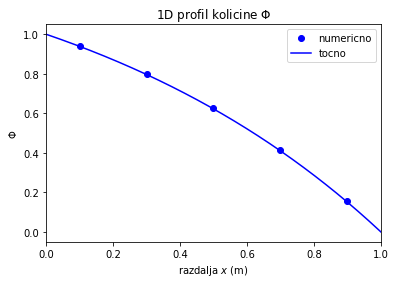

'F/D:'

0.2

In [2]:
N_slider = widgets.IntSlider(min=5, max=50, step=5, value=5)
u_slider = widgets.FloatSlider(min=-10, max=10, step=0.5, value=0.1)

w=widgets.interactive(CD_advection,
                      N=N_slider, 
                      u=u_slider
                     )

display(w)